# Importing required libraries

In [1]:
# We start by importing the necessary libraries for data manipulation and visualization, such as pandas, numpy, matplotlib, and seaborn.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# About the data

# Importing the data

In [2]:
# We then load our dataset into a Pandas DataFrame.

data = pd.read_excel('Spotify_data.xlsx')

# Understanding our data

In [3]:
# Display the first 5 rows of the data.
data.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [4]:
#  Get information about the columns, data types, and missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       520 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [5]:
# Columns
data.columns

Index(['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preffered_premium_plan', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_Influencial_mood',
       'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
       'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
       'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')

In [6]:
# Summary statistics
print(data.describe())

       music_recc_rating
count         520.000000
mean            3.503846
std             0.979552
min             1.000000
25%             3.000000
50%             3.500000
75%             4.000000
max             5.000000


In [7]:
# Shape of data
data.shape

(520, 20)

# Handling missing values

In [9]:
# Check for missing values in each column
data.isnull().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

# Exploratory Data Analysis

# Question 1: How frequently are users listening to music on Spotify?

While Traveling                                                                111
leisure time                                                                    87
While Traveling, leisure time                                                   65
While Traveling, Workout session, leisure time                                  48
Workout session                                                                 33
Study Hours                                                                     19
Office hours                                                                    16
While Traveling, Workout session                                                16
Office hours, While Traveling                                                   12
Office hours, While Traveling, leisure time                                     12
Office hours, While Traveling, Workout session                                  10
Study Hours, While Traveling, leisure time                                      10
Stud

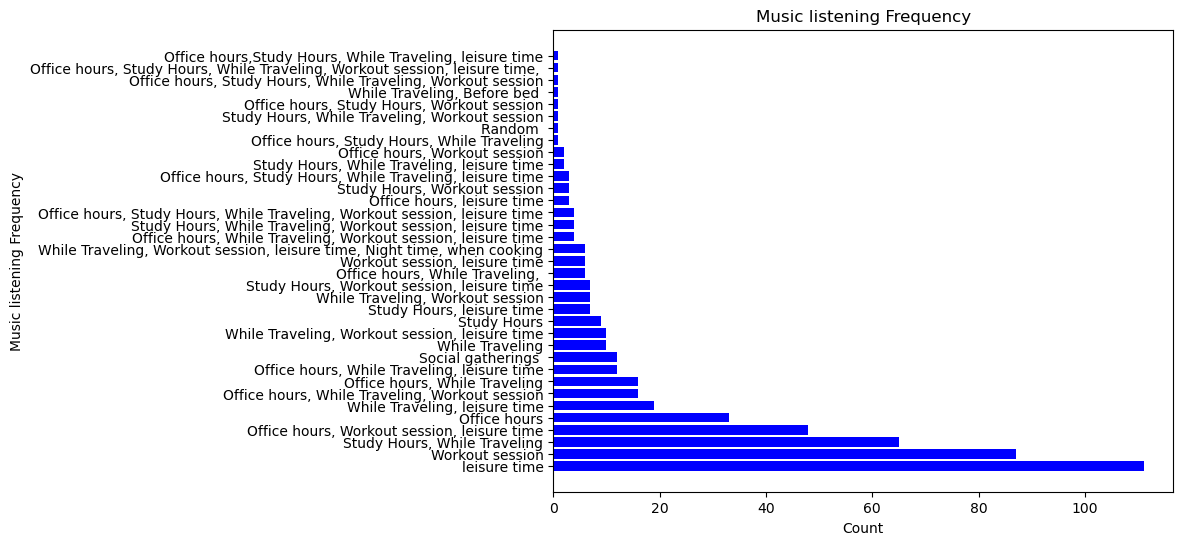

In [10]:
listening_frequency = data['music_lis_frequency'].value_counts()
print(listening_frequency)

# Visualize listening frequency
fig,ax=plt.subplots(figsize=(8,6))
x=data['music_lis_frequency'].unique()
y=data['music_lis_frequency'].value_counts().values
plt.barh(x,y,color='b')
plt.xlabel('Count')
plt.ylabel('Music listening Frequency')
plt.title('Music listening Frequency')
plt.show()

# Question 2: Are there specific time periods when user activity is higher?

In [11]:
x = data['music_time_slot'].value_counts()
x

Night        312
Afternoon    117
Morning       91
Name: music_time_slot, dtype: int64

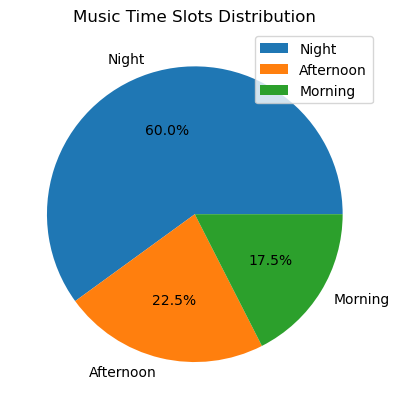

In [12]:
labels=['Night','Afternoon','Morning']
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.legend(loc='best')
plt.title('Music Time Slots Distribution')
plt.show()

[Text(0.5, 1.0, 'Which type of music is most preferred at what time slot')]

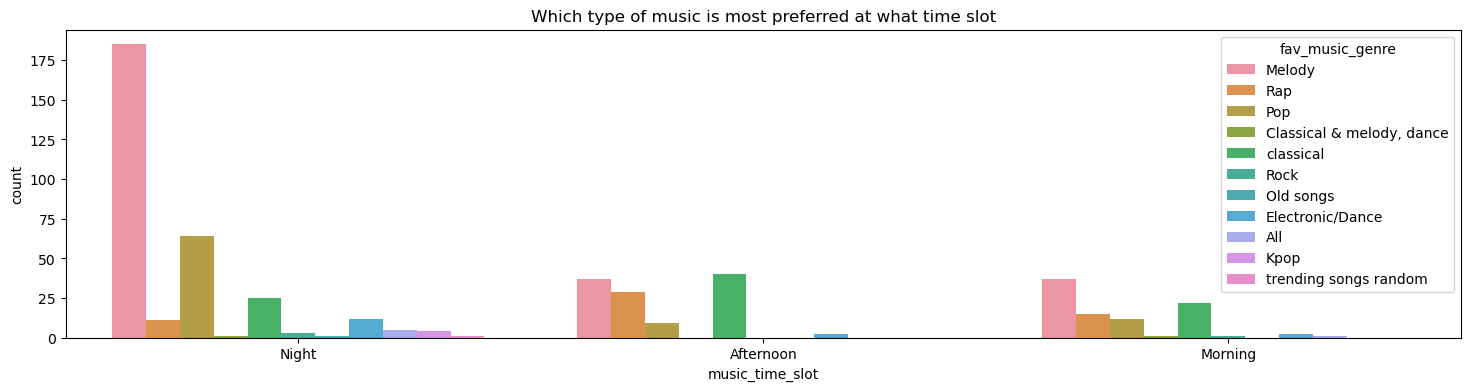

In [13]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(x='music_time_slot',data=data,hue='fav_music_genre').set(title="Which type of music is most preferred at what time slot")

# Question 3 : Which user group engage with the platform the most over time?

In [14]:
data['spotify_usage_period'].unique()

array(['More than 2 years', '6 months to 1 year', '1 year to 2 years',
       'Less than 6 months'], dtype=object)

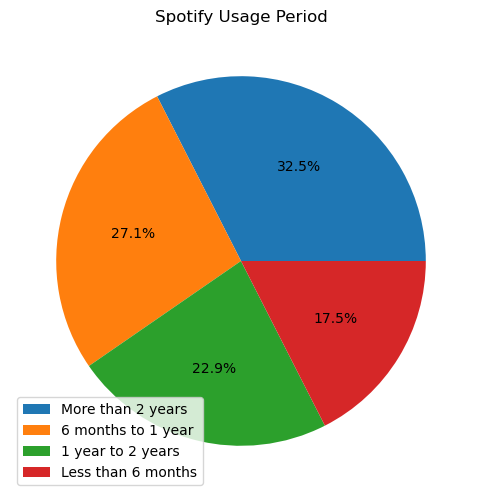

In [15]:
labels = ['More than 2 years', '6 months to 1 year', '1 year to 2 years','Less than 6 months']
x = data['spotify_usage_period'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(x,autopct='%1.1f%%')
plt.title('Spotify Usage Period')
plt.legend(labels, loc='best')
plt.show()

[Text(0.5, 1.0, 'Gender distribution according to Spotify Usage Period')]

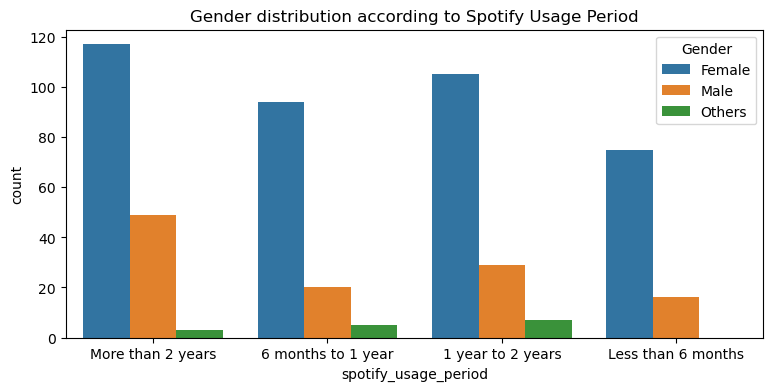

In [16]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.countplot(x='spotify_usage_period',data=data,hue='Gender').set(title="Gender distribution according to Spotify Usage Period")

[Text(0.5, 1.0, 'Age distribution according to Spotify Usage Period')]

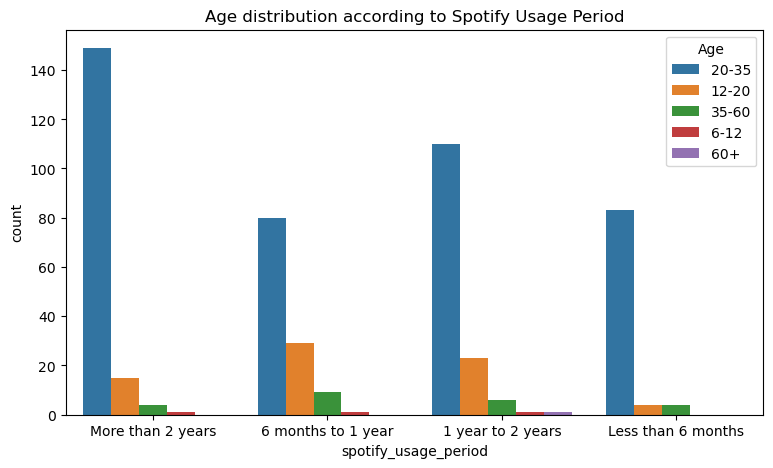

In [17]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot(x='spotify_usage_period',data=data,hue='Age').set(title="Age distribution according to Spotify Usage Period")

# Question 4: What genres are the most popular among different user segments

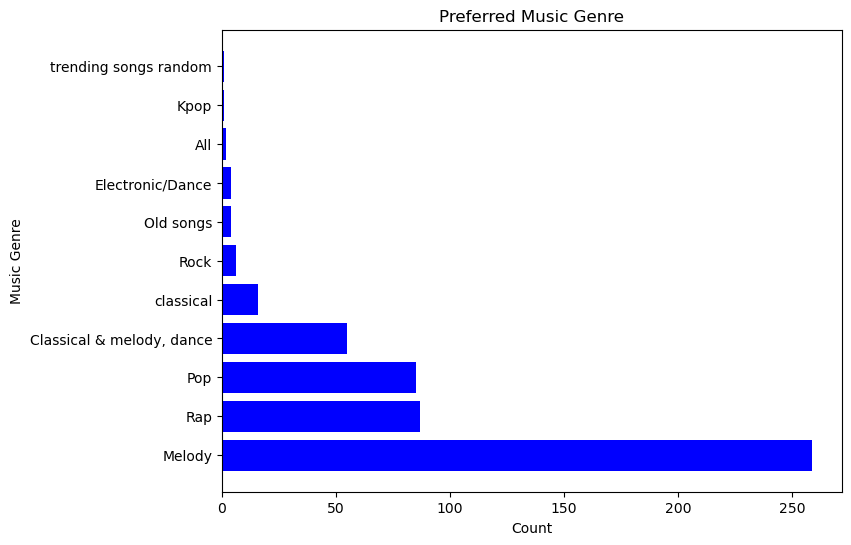

In [18]:
fig,ax=plt.subplots(figsize=(8,6))
x=data['fav_music_genre'].unique()
y=data['fav_music_genre'].value_counts().values
plt.barh(x,y,color='b')
plt.xlabel('Count')
plt.ylabel('Music Genre')
plt.title('Preferred Music Genre')
plt.show()

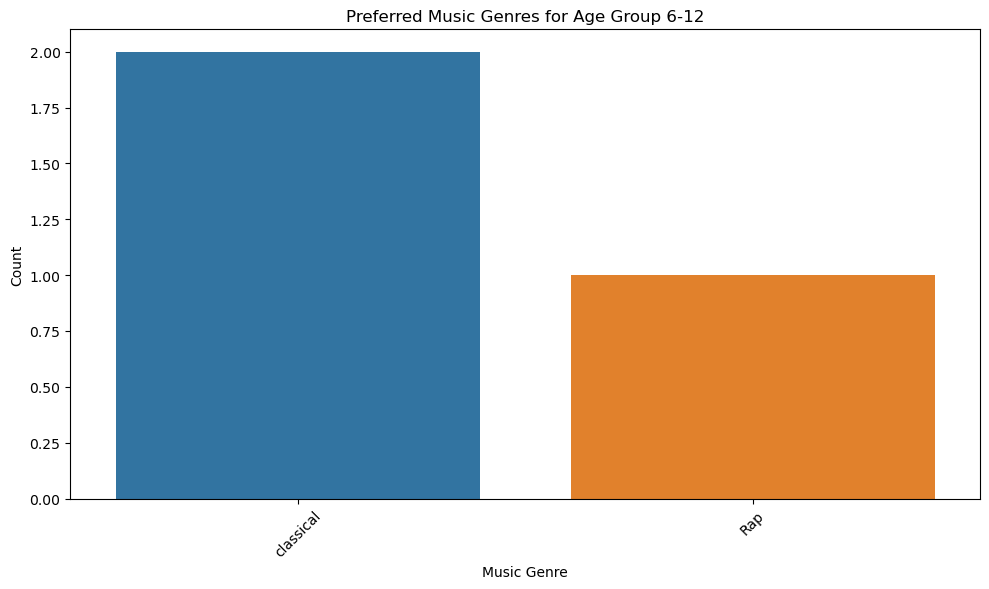

In [19]:
# Create a mask to filter data for the age group 6-12
age_group_data = data[data['Age'].str.match(r'6-12')]

# Calculate the counts of music genres preferred by the age group 6-12
age_group_genre_counts = age_group_data['fav_music_genre'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_genre_counts.index, y=age_group_genre_counts.values)
plt.title('Preferred Music Genres for Age Group 6-12')
plt.xlabel('Music Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

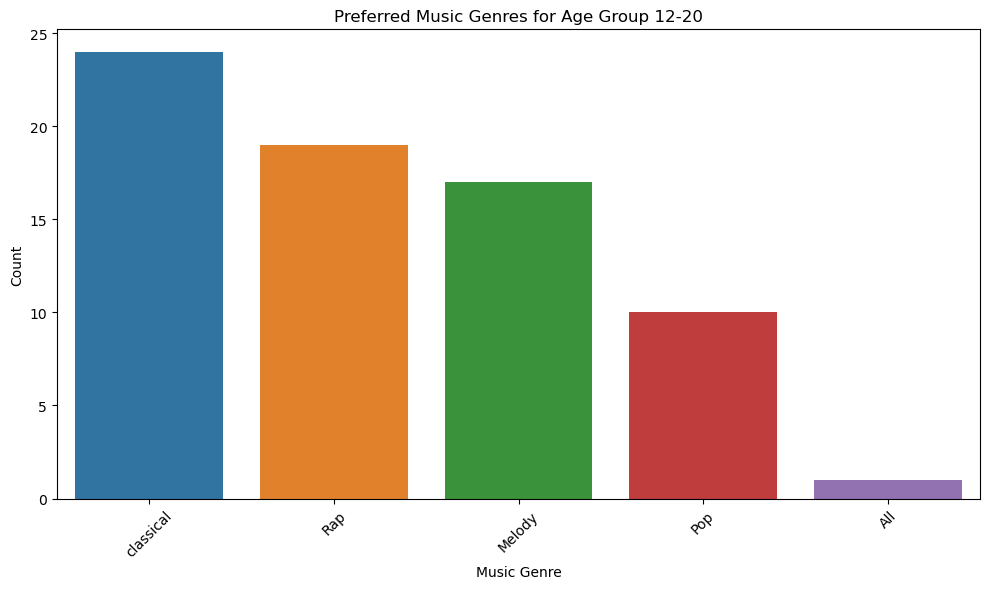

In [20]:
# Create a mask to filter data for the age group 12-20
age_group_data = data[data['Age'].str.match(r'1[2-9]-20')]

# Calculate the counts of music genres preferred by the age group 12-20
age_group_genre_counts = age_group_data['fav_music_genre'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_genre_counts.index, y=age_group_genre_counts.values)
plt.title('Preferred Music Genres for Age Group 12-20')
plt.xlabel('Music Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

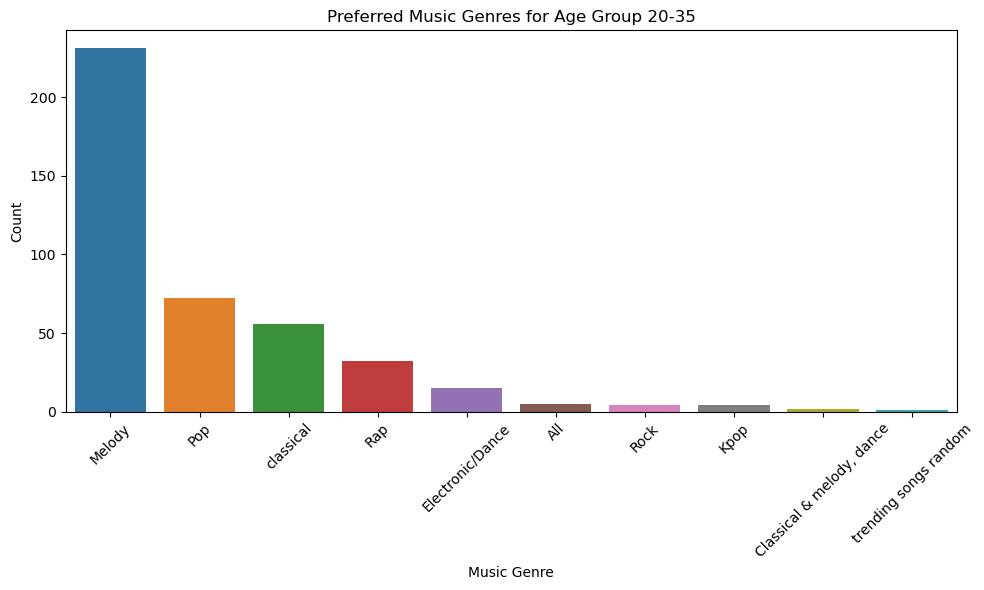

In [21]:
# Create a mask to filter data for the age group 20-35
age_group_data = data[data['Age'].str.match(r'2[0-9]-3[0-5]')]

# Calculate the counts of music genres preferred by the age group 20-35
age_group_genre_counts = age_group_data['fav_music_genre'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_genre_counts.index, y=age_group_genre_counts.values)
plt.title('Preferred Music Genres for Age Group 20-35')
plt.xlabel('Music Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

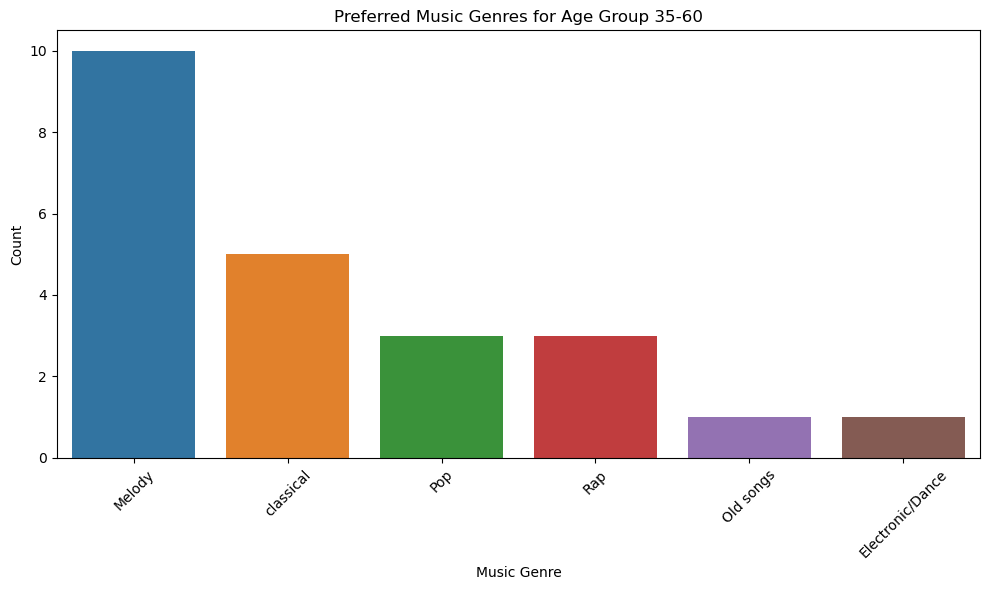

In [22]:
# Create a mask to filter data for the age group 35-60
age_group_data = data[data['Age'].str.match(r'[3-5][5-9]-60')]

# Calculate the counts of music genres preferred by the age group 35-60
age_group_genre_counts = age_group_data['fav_music_genre'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_genre_counts.index, y=age_group_genre_counts.values)
plt.title('Preferred Music Genres for Age Group 35-60')
plt.xlabel('Music Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Question 5 : Are there patterns in the type of content users consume during certain activities (e.g., working out, studying)?

In [23]:
# Create a contingency table between 'fav_music_genre' and 'music_listening_frequency'
contingency_table = pd.crosstab(data['fav_music_genre'], data['music_lis_frequency'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)

Chi-squared value: 412.39639693389984
P-value: 0.004323291010659508
Degrees of freedom: 340


# Question 6 : Which devices and platforms (mobile, desktop, smart speakers) do users prefer for music streaming?

In [24]:
len(data['spotify_listening_device'].unique())

15

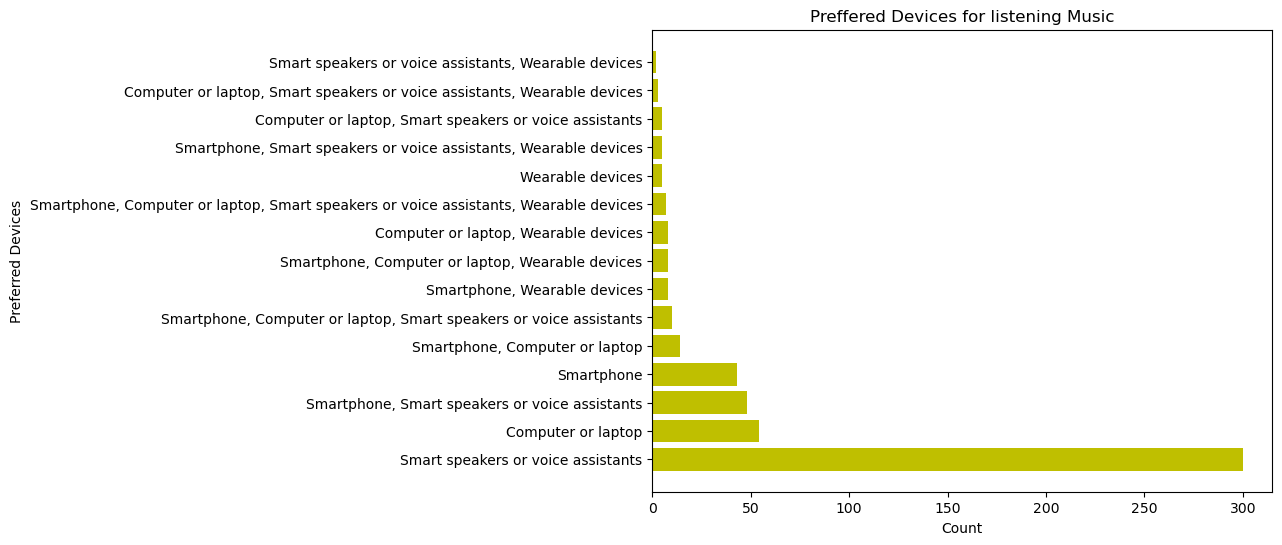

In [25]:
fig,ax=plt.subplots(figsize=(8,6))
y=data['spotify_listening_device'].value_counts().values
x=data['spotify_listening_device'].unique()
plt.barh(x,y,color='y')
plt.xlabel('Count')
plt.ylabel('Preferred Devices')
plt.title('Preffered Devices for listening Music')
plt.show()

# Conversion and Monetization:

In [26]:
data['spotify_subscription_plan'].value_counts()

Free (ad-supported)            424
Premium (paid subscription)     96
Name: spotify_subscription_plan, dtype: int64

[Text(0.5, 1.0, 'Spotify Subscription Plan distribution according to Gender')]

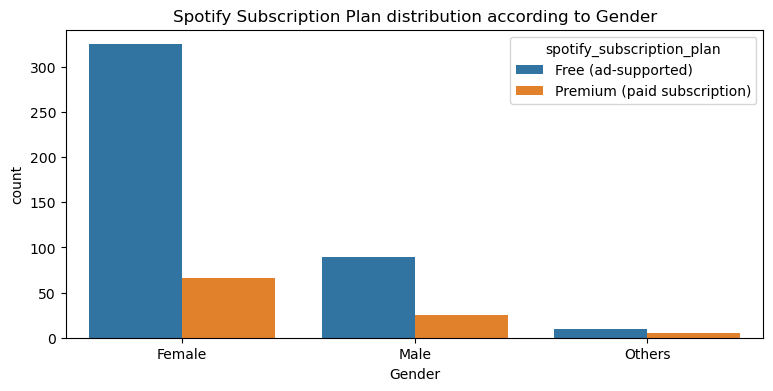

In [27]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.countplot(x='Gender',data=data,hue='spotify_subscription_plan').set(title="Spotify Subscription Plan distribution according to Gender")

[Text(0.5, 1.0, 'Spotify Subscription Plan distribution according to Age range')]

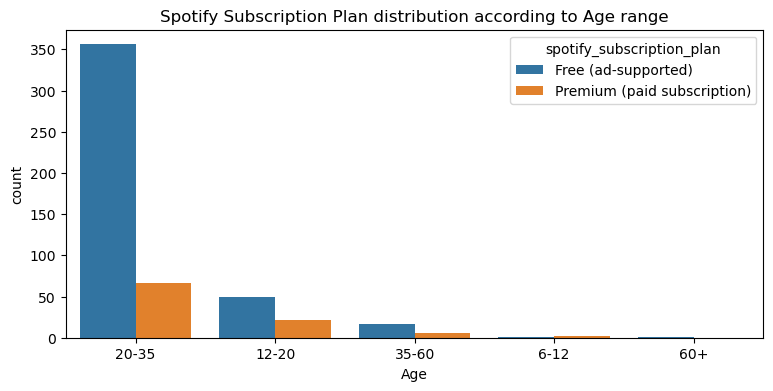

In [28]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.countplot(x='Age',data=data,hue='spotify_subscription_plan').set(title="Spotify Subscription Plan distribution according to Age range")

In [29]:
x = data['premium_sub_willingness'].value_counts()
x

No     334
Yes    186
Name: premium_sub_willingness, dtype: int64

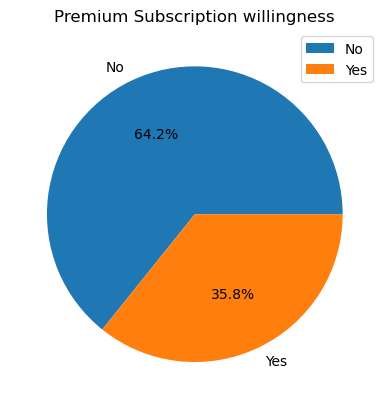

In [30]:
labels=['No','Yes']
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.legend(loc='best')
plt.title('Premium Subscription willingness')
plt.show()

[Text(0.5, 1.0, 'Willingness to Change distribution according to Gender')]

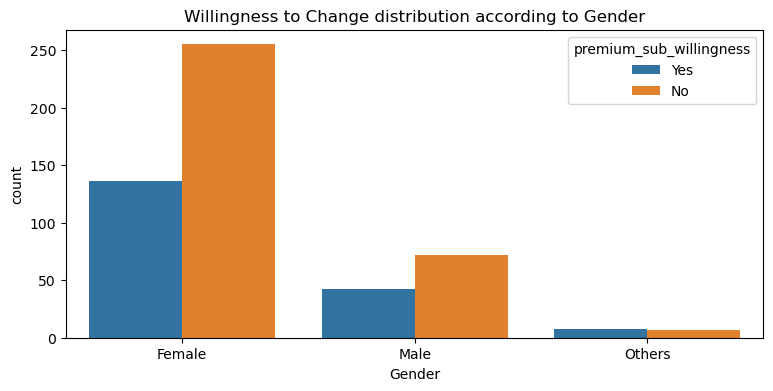

In [31]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.countplot(x='Gender',data=data,hue='premium_sub_willingness').set(title="Willingness to Change distribution according to Gender")

[Text(0.5, 1.0, 'Willingness to change distribution according to Age group')]

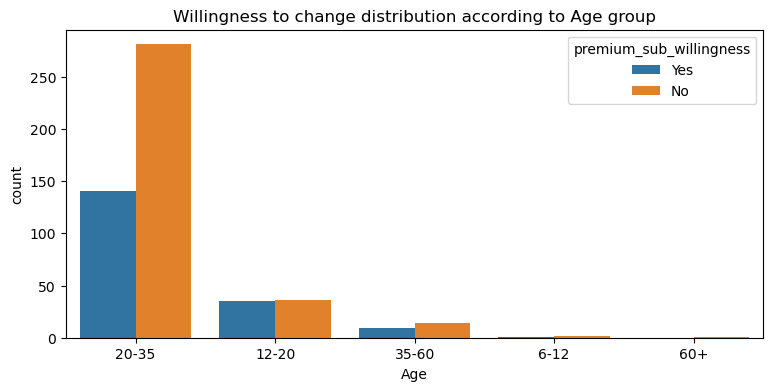

In [32]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.countplot(x='Age',data=data,hue='premium_sub_willingness').set(title="Willingness to change distribution according to Age group")

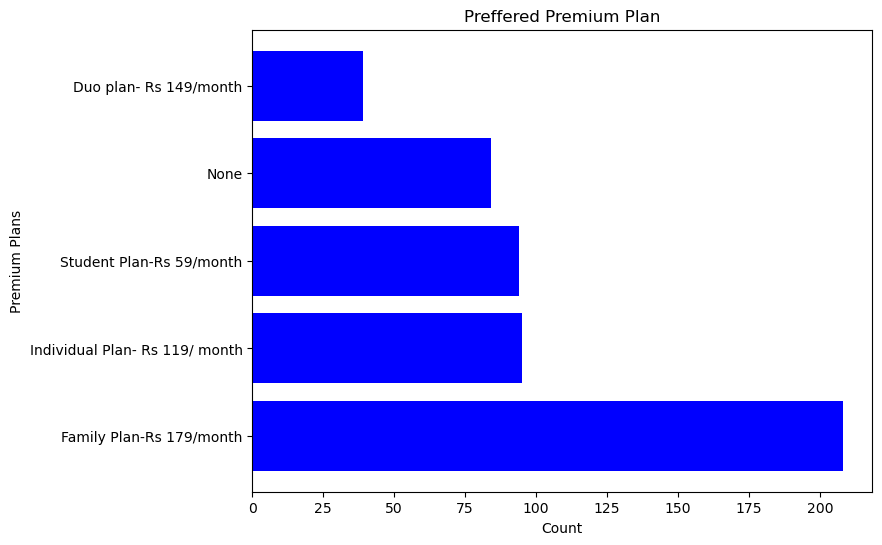

In [33]:
fig,ax=plt.subplots(figsize=(8,6))
x=data['preffered_premium_plan'].unique()
y=data['preffered_premium_plan'].value_counts().values
plt.barh(x,y,color='b')
plt.xlabel('Count')
plt.ylabel('Premium Plans')
plt.title('Preffered Premium Plan')
plt.show()

# Customer feedback and rating based on music recommendation:

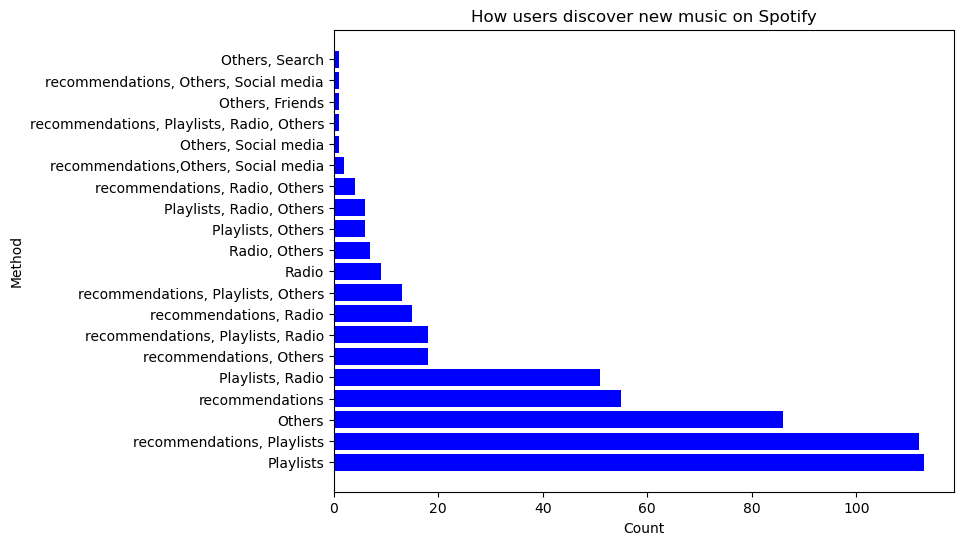

In [34]:
fig,ax=plt.subplots(figsize=(8,6))
x=data['music_expl_method'].unique()
y=data['music_expl_method'].value_counts().values
plt.barh(x,y,color='b')
plt.xlabel('Count')
plt.ylabel('Method')
plt.title('How users discover new music on Spotify')
plt.show()

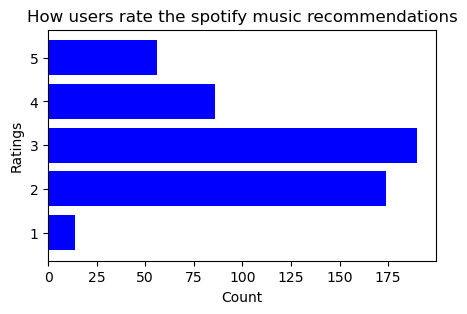

In [35]:
fig,ax=plt.subplots(figsize=(5,3))
x=data['music_recc_rating'].unique()
y=data['music_recc_rating'].value_counts().values
plt.barh(x,y,color='b')
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.title('How users rate the spotify music recommendations')
plt.show()

# Podcast 

In [36]:
x = data['pod_lis_frequency'].value_counts()
x

Rarely                  201
Never                   130
Once a week              91
Several times a week     78
Daily                    20
Name: pod_lis_frequency, dtype: int64

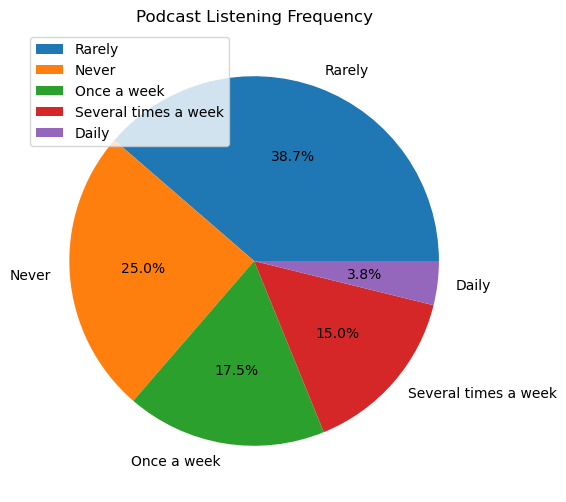

In [37]:
labels=['Rarely','Never','Once a week','Several times a week','Daily']
fig,ax=plt.subplots(figsize=(8,6))
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.title('Podcast Listening Frequency')
plt.show()

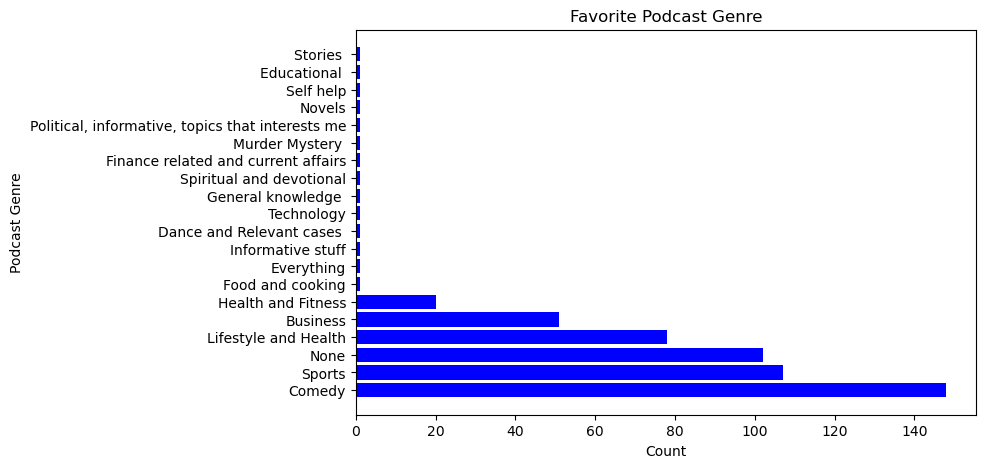

In [38]:
fig,ax=plt.subplots(figsize=(8,5))
x=data['fav_pod_genre'].unique()
y=data['fav_pod_genre'].value_counts().values
plt.barh(x,y,color='b')
plt.xlabel('Count')
plt.ylabel('Podcast Genre')
plt.title('Favorite Podcast Genre')
plt.show()

In [39]:
x = data['preffered_pod_format'].value_counts()
x

Story telling     152
None              140
Conversational    105
Interview          74
Educational        49
Name: preffered_pod_format, dtype: int64

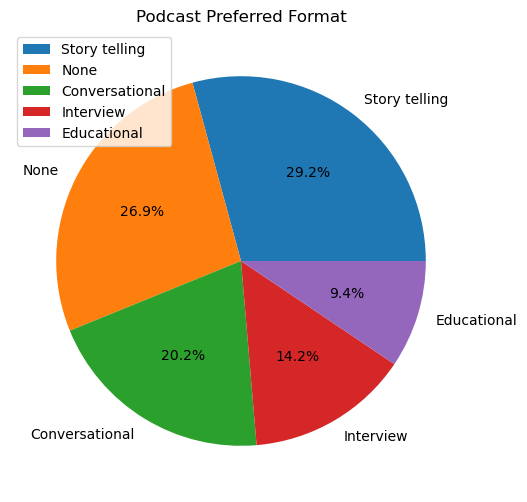

In [40]:
labels=['Story telling','None','Conversational','Interview','Educational']
fig,ax=plt.subplots(figsize=(8,6))
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.title('Podcast Preferred Format')
plt.show()

In [41]:
x = data['pod_host_preference'].value_counts()
x

Both                      180
None                      141
Well known individuals    114
unknown Podcasters         85
Name: pod_host_preference, dtype: int64

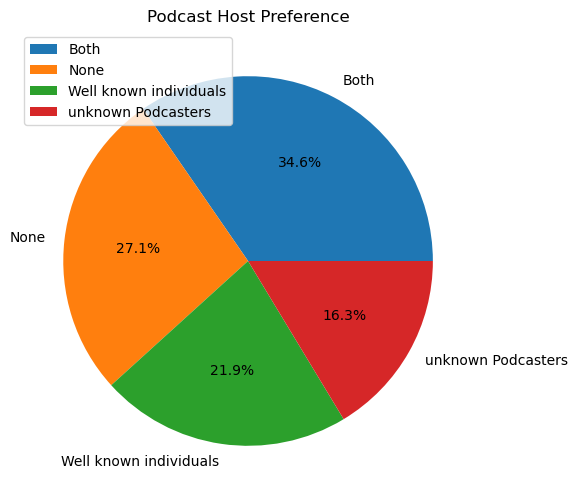

In [42]:
labels=['Both','None','Well known individuals','unknown Podcasters']
fig,ax=plt.subplots(figsize=(8,6))
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.title('Podcast Host Preference')
plt.show()

In [43]:
x = data['preffered_pod_duration'].value_counts()
x

Shorter    191
None       129
Both       117
Longer      83
Name: preffered_pod_duration, dtype: int64

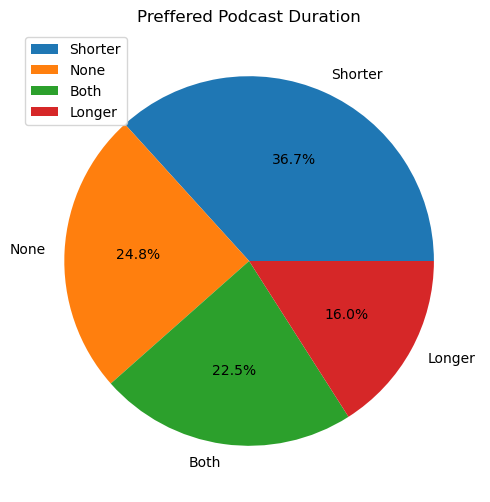

In [44]:
labels=['Shorter','None','Both','Longer']
fig,ax=plt.subplots(figsize=(8,6))
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.title('Preffered Podcast Duration')
plt.show()

In [45]:
x = data['pod_variety_satisfaction'].value_counts()
x

Ok                   280
Satisfied            162
Very Satisfied        48
Dissatisfied          20
Very Dissatisfied     10
Name: pod_variety_satisfaction, dtype: int64

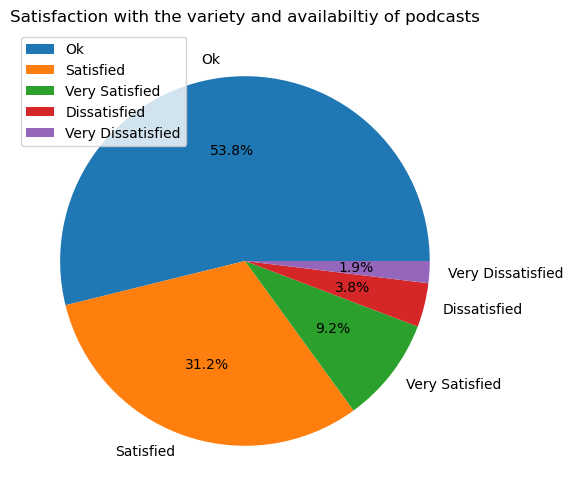

In [46]:
labels=['Ok','Satisfied','Very Satisfied','Dissatisfied','Very Dissatisfied']
fig,ax=plt.subplots(figsize=(8,6))
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.title('Satisfaction with the variety and availabiltiy of podcasts')
plt.show()